# Python for Data Analysis Project ~ Solution
This project is to test my ability to work with real-world data using Python. I will need to clean, manipulate, and analyze datasets using tools like Pandas, NumPy, Matplotlib and Seaborn.

For this project, I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1) 

`WELCOME!`  

## Data and Setup

**Import numpy and pandas**

In [1]:
# import necessary libraries
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Read in the 911 csv file as a dataframe called df from the data folder attached to the folder**

In [2]:
#load dataset
df = pd.read_csv('data/911.csv')

In [3]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
#missing values
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

**Check in the statistical summary of df**

In [5]:
#statistical summary
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


**Check the head of df**

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [7]:
top_5 = df['zip'].value_counts().head(5)
print("Top five [5] zipcodes for 911 calls")
print(top_5)

Top five [5] zipcodes for 911 calls
zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64


**What are the top 5 townships (twp) for 911 calls?**

In [8]:
print ("Top 5 townships[twp] for 911 calls")
top_5_townships = df['twp'].value_counts().head(5)
print(top_5_townships)

Top 5 townships[twp] for 911 calls
twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64


**Take a look at the 'title' column, how many unique title codes are there?**

In [9]:
unique_title_code = df['title'].nunique()
print(f'There are [{unique_title_code}] unique title codes in the dataset')


There are [110] unique title codes in the dataset


## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [10]:
df.title.head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [11]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

**What is the most common Reason for a 911 call based off of this new column?**

In [12]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

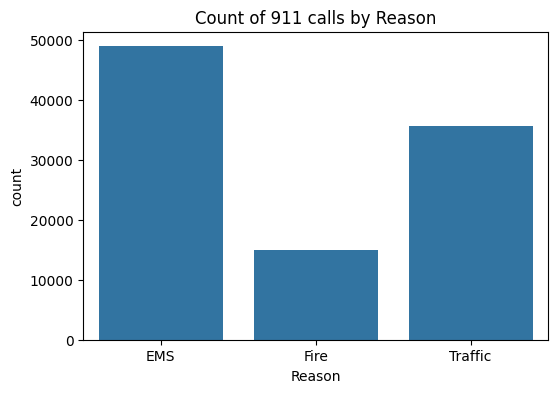

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Reason'])
plt.title('Count of 911 calls by Reason');

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [14]:
df.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
Reason        object
dtype: object

In [15]:
#check data type of timeStamp
type(df['timeStamp'].iloc[0])

str

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [17]:
#Create new columns for Hour, Month and Day of Week
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda date: date.month)
df['Day_of_week'] = df['timeStamp'].apply(lambda date: date.dayofweek)

In [18]:
df[['Hour', 'Month', 'Day_of_week']].head()

,Hour,Month,Day_of_week
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
#Map the day of the week to the actual string names
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day_of_week'] = df['Day_of_week'].map(dmap)
df['Day_of_week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day_of_week, dtype: object

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

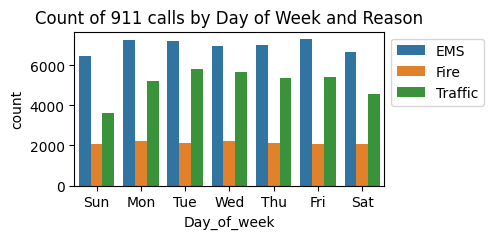

In [20]:
d_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.figure(figsize=(4,2))
sns.countplot(x=df['Day_of_week'], order=d_order, hue=df['Reason'])
plt.title('Count of 911 calls by Day of Week and Reason')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

**Now do the same for Month:**

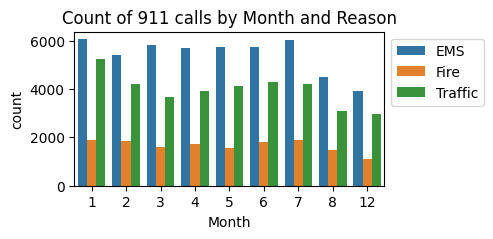

In [21]:
plt.figure(figsize=(4,2))
sns.countplot(x=df['Month'], hue=df['Reason'])
plt.title('Count of 911 calls by Month and Reason')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

**Did you notice something strange about the Plot?**

## It is missing some months! 9,10, and 11 are not there.

**We can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [22]:
#groupby month
groupbyMonth = df.groupby('Month').count().reset_index()
groupbyMonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

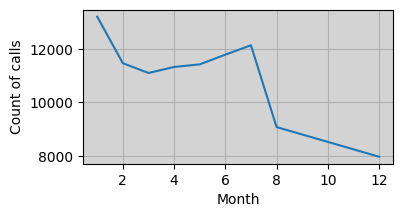

In [23]:
#plot the count of calls per month
plt.figure(figsize=(4,2))
sns.lineplot(x='Month', y='Reason', data=groupbyMonth)
plt.ylabel('Count of calls')
plt.grid()
plt.gca().set_facecolor('lightgrey');

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

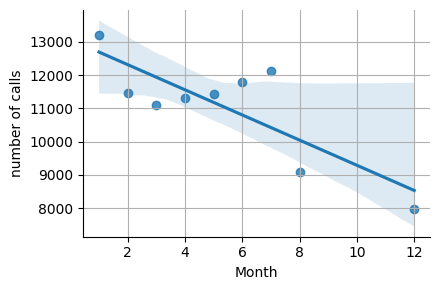

In [24]:
#use seaborn's implot to create a linear fit
sns.lmplot(x='Month', y='Reason', data=groupbyMonth, height=3, aspect=1.5)
plt.ylabel('number of calls')
plt.grid()

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [25]:
#create a new column date
df['date'] = df['timeStamp'].apply(lambda date: date.date())
df['date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

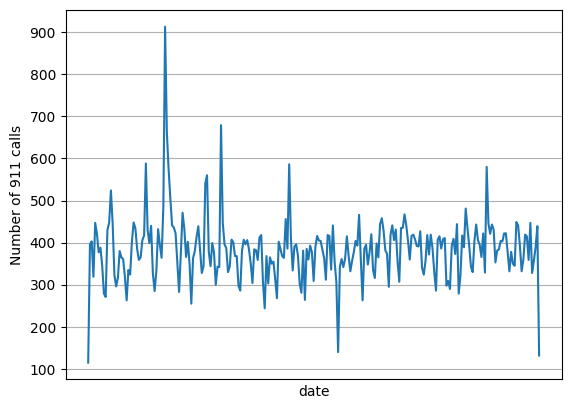

In [26]:
groupbydate = df.groupby('date').count().reset_index()
sns.lineplot(x='date', y='Reason', data = groupbydate)
plt.grid()
plt.xticks([])
plt.ylabel('Number of 911 calls');


## Thank You!